<a href="https://colab.research.google.com/github/RosarioMF-2020/MachineLearnig/blob/main/Prueba1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ENTRENAMIENTO UTILIZANDO Alumno1.cvs

In [38]:
pip install pandas openpyxl

In [39]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt

# Carga el CSV
df = pd.read_csv("alumnos1.csv")

In [40]:
df.head()

,sexo,edad,promedio,trabaja,estado
0,1,21,8.4,1,2
1,0,22,7.1,0,1
2,0,20,9.0,1,2
3,1,23,6.8,1,0
4,0,19,7.5,0,1


In [41]:
df = df.astype(str)

# Fila que contiene al menos un "?" en alguna celda
df_con_interrogacion = df[df.apply(lambda fila: fila.str.contains(r"\?").any(), axis=1)]

# Fila que NO contiene ningún "?" en ninguna celda
df_sin_interrogacion = df[~df.apply(lambda fila: fila.str.contains(r"\?").any(), axis=1)]

print(f"Filas con '?': {len(df_con_interrogacion)}")
print(f"Filas sin '?': {len(df_sin_interrogacion)}")

Filas con '?': 0
Filas sin '?': 50


In [42]:
df.info()  # Columnas, tipos de datos, valores no nulos, etc.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sexo      50 non-null     object
 1   edad      50 non-null     object
 2   promedio  50 non-null     object
 3   trabaja   50 non-null     object
 4   estado    50 non-null     object
dtypes: object(5)
memory usage: 2.1+ KB


# Se debe saber si existe desbalance de clases es muy importante contar con un dataset **balanceado**

estado
2    17
1    17
0    16
Name: count, dtype: int64


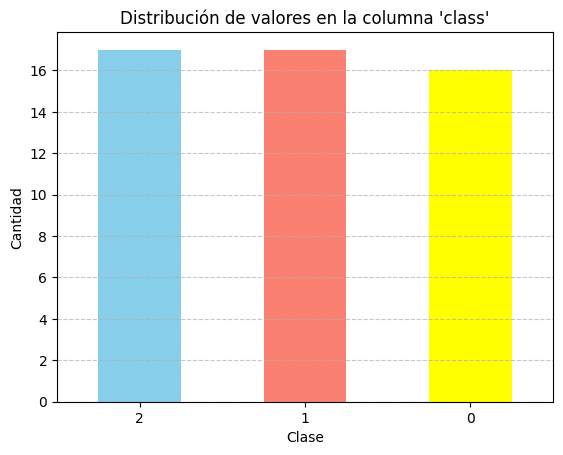

In [43]:
conteo_class = df["estado"].value_counts()
print(conteo_class)

conteo_class.plot(kind='bar', color=['skyblue', 'salmon', 'yellow'])
plt.title("Distribución de valores en la columna 'class'")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [44]:
C_1 = 50  # Clase 1
C_2 = 50  # Clase 2
C_3 = 50  # Clase 3

C_1 = (C_1*100)/150
C_2 = (C_2*100)/150
C_3 = (C_3*100)/150

print(C_1)
print(C_2)
print(C_3)

33.333333333333336
33.333333333333336
33.333333333333336


Convertimos todos los valores a tipo Int

In [45]:
df.head()

,sexo,edad,promedio,trabaja,estado
0,1,21,8.4,1,2
1,0,22,7.1,0,1
2,0,20,9.0,1,2
3,1,23,6.8,1,0
4,0,19,7.5,0,1


Convertir todo a número

In [46]:
df = df.astype(float)

In [47]:
df.head()

,sexo,edad,promedio,trabaja,estado
0,1.0,21.0,8.4,1.0,2.0
1,0.0,22.0,7.1,0.0,1.0
2,0.0,20.0,9.0,1.0,2.0
3,1.0,23.0,6.8,1.0,0.0
4,0.0,19.0,7.5,0.0,1.0


Ya que tenemos nuestro dataset sin valores faltantes ahora debemos revisar si existe algun valor NaN

In [48]:
# Verificar si hay al menos un NaN en el DataFrame
hay_nan = df.isnull().values.any()

print("¿Hay valores NaN?:", hay_nan)

if not hay_nan:
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    print("Se ha reordenado aleatoriamente el DataFrame.")
else:
    print("El DataFrame contiene valores NaN. No se reordenó.")

¿Hay valores NaN?: False
Se ha reordenado aleatoriamente el DataFrame.


Separar el DataFrame por clases (clase 1, clase 2, clase 3, clase 4 y clase 5).

Dividir cada clase en conjunto de entrenamiento (80%) y prueba (20%).

In [50]:
from sklearn.model_selection import train_test_split

# 1. Mostrar las clases disponibles
clases = df['estado'].unique()
print("Clases encontradas:", clases)

# 2. Filtrar por cada clase
df_clase_1 = df[df['estado'] == 0.0]
df_clase_2 = df[df['estado'] == 1.0]
df_clase_3 = df[df['estado'] == 2.0]

print(f"Total en clase 1: {len(df_clase_1)}")
print(f"Total en clase 2: {len(df_clase_2)}")
print(f"Total en clase 3: {len(df_clase_3)}")

# 3. Dividir cada clase en entrenamiento y prueba
clase_1_entrenamiento, clase_1_prueba = train_test_split(df_clase_1, test_size=0.2, random_state=42)
clase_2_entrenamiento, clase_2_prueba = train_test_split(df_clase_2, test_size=0.2, random_state=42)
clase_3_entrenamiento, clase_3_prueba = train_test_split(df_clase_3, test_size=0.2, random_state=42)

Clases encontradas: [1. 0. 2.]
Total en clase 1: 16
Total en clase 2: 17
Total en clase 3: 17


Para visualizar imprimiremos usando los metos head para cada clase y usaremos el metodo shape para conocer el tamaño del arreglo de cada clase.

In [51]:
print("▶️ Clase 1 - Entrenamiento (80%)")
print(clase_1_entrenamiento.head())
print(clase_1_entrenamiento.shape)

print("\n▶️ Clase 1 - Prueba (20%)")
print(clase_1_prueba.head())
print(clase_1_prueba.shape)

print("\n▶️ Clase 2 - Entrenamiento (80%)")
print(clase_2_entrenamiento.head())
print(clase_2_entrenamiento.shape)

print("\n▶️ Clase 2 - Prueba (20%)")
print(clase_2_prueba.head())
print(clase_2_prueba.shape)

print("\n▶️ Clase 3 - Entrenamiento (80%)")
print(clase_3_entrenamiento.head())
print(clase_3_entrenamiento.shape)

print("\n▶️ Clase 3 - Prueba (20%)")
print(clase_3_prueba.head())
print(clase_3_prueba.shape)

▶️ Clase 1 - Entrenamiento (80%)
    sexo  edad  promedio  trabaja  estado
42   0.0  20.0       5.6      1.0     0.0
32   0.0  21.0       5.8      0.0     0.0
22   0.0  22.0       6.6      1.0     0.0
27   1.0  23.0       5.7      0.0     0.0
10   0.0  20.0       6.7      1.0     0.0
(12, 5)

▶️ Clase 1 - Prueba (20%)
    sexo  edad  promedio  trabaja  estado
1    1.0  20.0       6.1      1.0     0.0
2    0.0  19.0       6.3      1.0     0.0
17   0.0  22.0       5.5      0.0     0.0
43   1.0  23.0       6.6      1.0     0.0
(4, 5)

▶️ Clase 2 - Entrenamiento (80%)
    sexo  edad  promedio  trabaja  estado
36   1.0  20.0       7.7      1.0     1.0
41   0.0  19.0       7.2      0.0     1.0
23   0.0  20.0       7.6      0.0     1.0
40   1.0  21.0       7.3      0.0     1.0
5    0.0  20.0       7.0      0.0     1.0
(13, 5)

▶️ Clase 2 - Prueba (20%)
    sexo  edad  promedio  trabaja  estado
0    1.0  24.0       7.0      0.0     1.0
3    1.0  19.0       6.9      1.0     1.0
11   0.0  19.0  